In [18]:
""" 히스토그램 그리는 영역"""

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)
    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
    return imgHist


path = 'E:\experiment data/aluminum/2021-01-27/0.05mmsec_125f_epoxy_dic\dic/C001H001S0001-00.cih08.jpg'
src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()

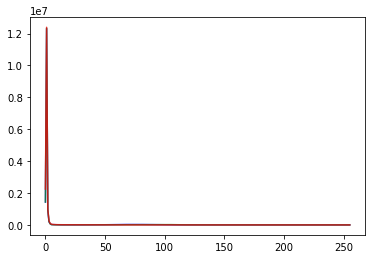

In [5]:
""" color 히스토그램 그리는 영역"""
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


# 컬러 영상의 히스토그램
path = r'C:\Users\ghrms\Desktop\d\20210201_165036.jpg'
src = cv2.imread(path)

if src is None:
    print('Image load failed!')
    sys.exit()

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c, alpha= 0.7)

cv2.imshow('src', src)
cv2.waitKey(1)

plt.show()

cv2.destroyAllWindows()

In [15]:
""" 히스토그램트랙바 HSV 칼라"""

import sys
import numpy as np
import cv2

path = r'C:\Users\ghrms\Desktop\d\20210201_165036.jpg'
src = cv2.imread(path)

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')
    smin = cv2.getTrackbarPos('S_min', 'dst')
    smax = cv2.getTrackbarPos('S_max', 'dst')
    vmin = cv2.getTrackbarPos('V_min', 'dst')
    vmax = cv2.getTrackbarPos('V_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, smin, vmin), (hmax, smax, vmax))
    cv2.imshow('dst', dst)

cv2.namedWindow('src', cv2.WINDOW_NORMAL)
cv2.resizeWindow('src', 1920, 1080)
cv2.imshow('src', src)
cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.resizeWindow('dst', 1920, 1080)
cv2.createTrackbar('H_min', 'dst', 0, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 0, 179, on_trackbar)
cv2.createTrackbar('S_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('S_max', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('V_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('V_max', 'dst', 0, 255, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()

In [16]:
""" 히스토그램트랙바 RGB 칼라"""

import sys
import numpy as np
import cv2

path = r'C:\Users\ghrms\Desktop\d\20210201_165036.jpg'
src = cv2.imread(path)

if src is None:
    print('Image load failed!')
    sys.exit()

def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('R_min', 'dst')
    rmax = cv2.getTrackbarPos('R_max', 'dst')
    gmin = cv2.getTrackbarPos('G_min', 'dst')
    gmax = cv2.getTrackbarPos('G_max', 'dst')
    bmin = cv2.getTrackbarPos('B_min', 'dst')
    bmax = cv2.getTrackbarPos('B_max', 'dst')

    dst = cv2.inRange(src, (rmin, gmin, bmin), (rmax, gmax, bmax))
    cv2.imshow('dst', dst)

cv2.namedWindow('src', cv2.WINDOW_NORMAL)
cv2.resizeWindow('src', 1920, 1080)
cv2.imshow('src', src)
cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.resizeWindow('dst', 1920, 1080)
cv2.createTrackbar('R_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('R_max', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('G_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('G_max', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('B_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('B_max', 'dst', 0, 255, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()


In [16]:
"""Threshold  이용하여 영역 확인"""

import cv2
src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def on_threshhold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

cv2.imshow('src',src)
cv2.namedWindow('dst')
cv2.createTrackbar('Treshold', 'dst', 0, 255, on_threshhold)
cv2.setTrackbarPos('Treshold', 'dst', 125)

cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
""" 배경 음영처리 """
import sys
import numpy as np
import cv2


src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()
